### Time Series

* time series is tricky, tests are error prone

* types of time series: global temperatures/economic data/stock prices/speech recognition

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

#### workflow

    1.) Basics of handling Time Series data 
    2.) Data Cleaning/Transformations/Decomposition 
    3.) EDA/Time Series Visualisation
    4.) Stationarity 
    5.) Feature Engineering 
    6.) Modelling Approaches
    

this notebook will be looking at **point (1)**.

## Basics of handling Time Series data

### 1 - Date & Time

`.date_range()` method 
* check out the pandas docs for more argument parameters 

In [3]:
rng = pd.date_range(start = '2024 May 1', periods = 10, freq = 'D')
rng

DatetimeIndex(['2024-05-01', '2024-05-02', '2024-05-03', '2024-05-04',
               '2024-05-05', '2024-05-06', '2024-05-07', '2024-05-08',
               '2024-05-09', '2024-05-10'],
              dtype='datetime64[ns]', freq='D')

In [4]:
type(rng[0])

pandas._libs.tslibs.timestamps.Timestamp

**timestamps**

In [6]:
t = pd.Timestamp('2024 May 19') # goes down to nanoseconds; 64-bit datatype
t

Timestamp('2024-05-19 00:00:00')

timestamp properties 

- refer to https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

In [8]:
t.quarter

2

In [11]:
t.dayofweek

6

**timedelta**

In [13]:
pd.Timedelta('1d 1ms')

Timedelta('1 days 00:00:00.001000')

time offsets 

In [16]:
pd.Timestamp('2024 May 19 8:00') + pd.Timedelta('1.5h')

Timestamp('2024-05-19 09:30:00')

**timespans**

In [18]:
p = pd.Period('May 2024')
t = pd.Timestamp('2024 May 19 8:00')

In [19]:
p.start_time < t and p.end_time > t

True

In [23]:
rng = pd.period_range(start='1 May 2024 12:15', freq= '60T',periods = 10) #look at discrepancy with 'H'
rng

PeriodIndex(['2024-05-01 12:15', '2024-05-01 13:15', '2024-05-01 14:15',
             '2024-05-01 15:15', '2024-05-01 16:15', '2024-05-01 17:15',
             '2024-05-01 18:15', '2024-05-01 19:15', '2024-05-01 20:15',
             '2024-05-01 21:15'],
            dtype='period[60T]')

Indexing Time Series with a date_range

In [25]:
period = 40
ts_dt = pd.Series(range(period),pd.date_range('1 May 2024 12:15', freq='60T', periods=period))
ts_dt.head()

2024-05-01 12:15:00    0
2024-05-01 13:15:00    1
2024-05-01 14:15:00    2
2024-05-01 15:15:00    3
2024-05-01 16:15:00    4
Freq: 60T, dtype: int64

In [27]:
type(ts_dt.index)

pandas.core.indexes.datetimes.DatetimeIndex

NOTE: it's either a point in time or a period in time -- each will have its own datatype and its own index

Converting to PeriodIndex

In [30]:
ts_pd = ts_dt.to_period(freq='60T') # no seconds in period -- every second is within the period
ts_pd.head()

2024-05-01 12:15    0
2024-05-01 13:15    1
2024-05-01 14:15    2
2024-05-01 15:15    3
2024-05-01 16:15    4
Freq: 60T, dtype: int64

In [39]:
ts_dt['1 May 2024 13']

2024-05-01 13:15:00    1
Freq: 60T, dtype: int64

In [38]:
ts_pd['1 May 2024 13']

2024-05-01 13:15    1
Freq: 60T, dtype: int64

In [40]:
# grabbing periods of interest
ts_pd['1 May 2024':'2 May 2024']

2024-05-01 12:15     0
2024-05-01 13:15     1
2024-05-01 14:15     2
2024-05-01 15:15     3
2024-05-01 16:15     4
2024-05-01 17:15     5
2024-05-01 18:15     6
2024-05-01 19:15     7
2024-05-01 20:15     8
2024-05-01 21:15     9
2024-05-01 22:15    10
2024-05-01 23:15    11
2024-05-02 00:15    12
2024-05-02 01:15    13
2024-05-02 02:15    14
2024-05-02 03:15    15
2024-05-02 04:15    16
2024-05-02 05:15    17
2024-05-02 06:15    18
2024-05-02 07:15    19
2024-05-02 08:15    20
2024-05-02 09:15    21
2024-05-02 10:15    22
2024-05-02 11:15    23
2024-05-02 12:15    24
2024-05-02 13:15    25
2024-05-02 14:15    26
2024-05-02 15:15    27
2024-05-02 16:15    28
2024-05-02 17:15    29
2024-05-02 18:15    30
2024-05-02 19:15    31
2024-05-02 20:15    32
2024-05-02 21:15    33
2024-05-02 22:15    34
2024-05-02 23:15    35
Freq: 60T, dtype: int64

Generating string representation of datetime:

In [47]:
t

Timestamp('2024-05-19 08:00:00')

In [45]:
ts = t.strftime(format='%Y-%m-%d')
ts

'2024-05-19'

In [46]:
type(ts)

str

### 2 - Timezones

In [52]:
rng = pd.date_range(start = '2024 May 1', periods = 10, freq = 'D', tz='US/Central')
rng.tz

<DstTzInfo 'US/Central' LMT-1 day, 18:09:00 STD>

getting a list of all timezones

In [53]:
from pytz import common_timezones, all_timezones

In [54]:
len(common_timezones)

434

In [55]:
len(all_timezones)

596

In [57]:
# finding non-common timezones
set(all_timezones) - set(common_timezones)

{'Africa/Asmera',
 'Africa/Timbuktu',
 'America/Argentina/ComodRivadavia',
 'America/Atka',
 'America/Buenos_Aires',
 'America/Catamarca',
 'America/Coral_Harbour',
 'America/Cordoba',
 'America/Ensenada',
 'America/Fort_Wayne',
 'America/Godthab',
 'America/Indianapolis',
 'America/Jujuy',
 'America/Knox_IN',
 'America/Louisville',
 'America/Mendoza',
 'America/Montreal',
 'America/Nipigon',
 'America/Pangnirtung',
 'America/Porto_Acre',
 'America/Rainy_River',
 'America/Rosario',
 'America/Santa_Isabel',
 'America/Shiprock',
 'America/Thunder_Bay',
 'America/Virgin',
 'Antarctica/South_Pole',
 'Asia/Ashkhabad',
 'Asia/Calcutta',
 'Asia/Chongqing',
 'Asia/Chungking',
 'Asia/Dacca',
 'Asia/Harbin',
 'Asia/Istanbul',
 'Asia/Kashgar',
 'Asia/Katmandu',
 'Asia/Macao',
 'Asia/Rangoon',
 'Asia/Saigon',
 'Asia/Tel_Aviv',
 'Asia/Thimbu',
 'Asia/Ujung_Pandang',
 'Asia/Ulan_Bator',
 'Atlantic/Faeroe',
 'Atlantic/Jan_Mayen',
 'Australia/ACT',
 'Australia/Canberra',
 'Australia/Currie',
 'Austral

localizing timezones

In [59]:
t_naive = t

In [61]:
t = t_naive.tz_localize(tz = 'US/Central')
t

Timestamp('2024-05-19 08:00:00-0500', tz='US/Central')

In [63]:
t.tz_convert('Asia/Tokyo')

Timestamp('2024-05-19 22:00:00+0900', tz='Asia/Tokyo')

### 3 - Data Frames 

In [105]:
df = pd.read_csv("airline-passengers.csv")
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [106]:
type(df['Month'][0])

str

In [107]:
# converting from str to datetime
df['Month'] = pd.to_datetime(df['Month'])
type(df['Month'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [108]:
# set the time series to be the index
df.set_index('Month', inplace=True)

In [109]:
min(df.index)

Timestamp('1949-01-01 00:00:00')

In [110]:
max(df.index)

Timestamp('1960-12-01 00:00:00')

In [111]:
#recall that the original data did not specify a day so is a datetime index the most appropriate or is period better?
df = df.to_period()

In [112]:
type(df.index)

pandas.core.indexes.period.PeriodIndex

### 4 - Resampling

In [118]:
rng = pd.date_range('1/1/2024', periods=72, freq='H')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts.head()

2024-01-01 00:00:00   -0.393337
2024-01-01 01:00:00    0.504862
2024-01-01 02:00:00    0.498541
2024-01-01 03:00:00    0.098339
2024-01-01 04:00:00    0.759361
Freq: H, dtype: float64

`.asfreq()` method

* this is for more frequent data; works the same if you want less frequent data (but you will drop data - lose data)
* only works with **ordered** data

In [119]:
# to convert to every 45mins with forward-fill
converted = ts.asfreq('45Min', method='ffill')
converted.head()

2024-01-01 00:00:00   -0.393337
2024-01-01 00:45:00   -0.393337
2024-01-01 01:30:00    0.504862
2024-01-01 02:15:00    0.498541
2024-01-01 03:00:00    0.098339
Freq: 45T, dtype: float64

points in time are not defined $\therefore$ `ffill` takes care of that

In [120]:
ts.shape

(72,)

In [121]:
converted.shape

(95,)

`.resample()` method
* more flexible, can be used to even out irregular time series
* could think of it as an aggregation object vs more limited asfreq

In [123]:
ts.resample('2H').mean()[1:10]

2024-01-01 02:00:00    0.298440
2024-01-01 04:00:00   -0.168597
2024-01-01 06:00:00    0.172232
2024-01-01 08:00:00    0.865022
2024-01-01 10:00:00   -0.897810
2024-01-01 12:00:00   -0.462403
2024-01-01 14:00:00   -0.449240
2024-01-01 16:00:00   -0.080209
2024-01-01 18:00:00    0.659325
Freq: 2H, dtype: float64

In [128]:
ts.head()

2024-01-01 00:00:00   -0.393337
2024-01-01 01:00:00    0.504862
2024-01-01 02:00:00    0.498541
2024-01-01 03:00:00    0.098339
2024-01-01 04:00:00    0.759361
Freq: H, dtype: float64

In [130]:
# what about irregular timeseries?
irreg_rng = rng.to_series().sample(frac=0.8).index
irreg_ts = ts.reindex(irreg_rng)

irreg_ts.head()

2024-01-02 00:00:00   -0.307027
2024-01-01 16:00:00   -1.364402
2024-01-03 06:00:00    1.524989
2024-01-02 05:00:00    0.254291
2024-01-01 11:00:00   -0.735384
dtype: float64

In [134]:
irreg_ts.resample('D').mean() # you would have to sort first if you wanted to use `.asfreq()`

2024-01-01    0.122333
2024-01-02    0.078611
2024-01-03   -0.052825
Freq: D, dtype: float64

### 5 - Moving Window Functions

rolling windows vs expanding windows
- rolling window takes a more piecewise view of your data, aggregates over 3 days for e.g:
- expanding window yields values of statistic cumulatively (with all data available up to that point)

windows introduce latency; ways to get around this -- weighted average for e.g (think about autocorrelation)

recall in time series - **points tend to relate to one another**

one way to look at this is by differencing/shifting

In [145]:
ts = pd.Series(np.random.randn(20),pd.date_range('7/1/16',freq = 'H',periods =20))
ts_lagged = ts.shift(5) # notice it shifts into the future

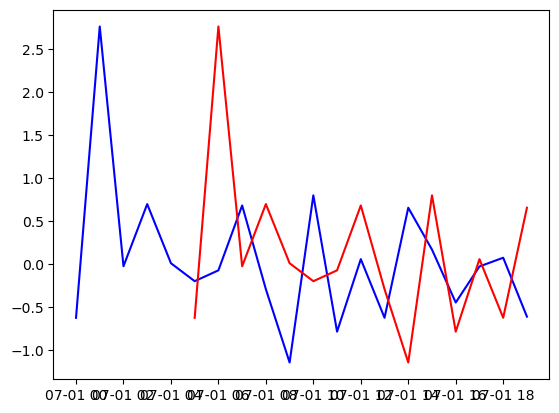

In [146]:
plt.plot(ts, color = 'blue')
plt.plot(ts_lagged, color = 'red')

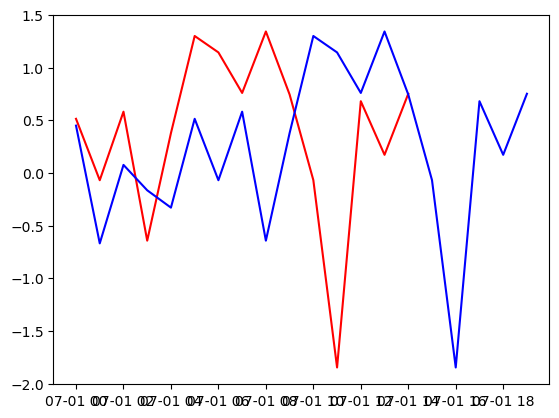

In [148]:
ts = pd.Series(np.random.randn(20),pd.date_range('7/1/16',freq = 'H',periods =20))
ts_lagged = ts.shift(-5)
plt.plot(ts_lagged, color = 'red')
plt.plot(ts, color = 'blue')


In [151]:
df = pd.DataFrame(np.random.randn(600, 3), index = 
                  pd.date_range('7/1/2016', freq = 'D', periods = 600), 
                  columns = ['A', 'B', 'C'])

In [152]:
df.index

DatetimeIndex(['2016-07-01', '2016-07-02', '2016-07-03', '2016-07-04',
               '2016-07-05', '2016-07-06', '2016-07-07', '2016-07-08',
               '2016-07-09', '2016-07-10',
               ...
               '2018-02-11', '2018-02-12', '2018-02-13', '2018-02-14',
               '2018-02-15', '2018-02-16', '2018-02-17', '2018-02-18',
               '2018-02-19', '2018-02-20'],
              dtype='datetime64[ns]', length=600, freq='D')

`.rolling()` method
* think about window as row-counts; you need to specify dependent on freq
* rolling is just an aggregation object -- it does not do anything until you specify what to do it to (i.e: Statistics)
* common example in finance 20D MA in code: `ma20 = spy_df['Close'].rolling(20).mean()`

r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var

can use `.apply(lambda x:...)` for custom functions

<Axes: >

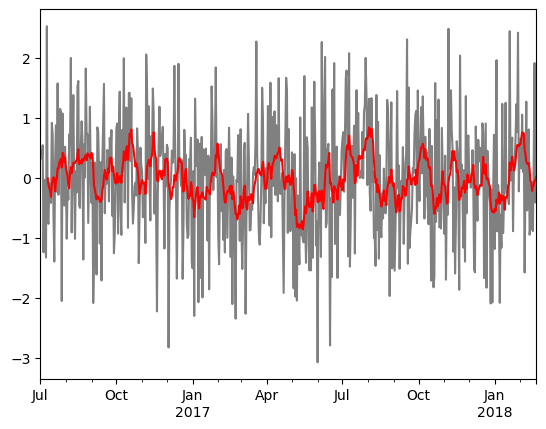

In [153]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
df['A'].plot(color='grey')
r.mean()['A'].plot(color='red')

suppose you have daily data; want to generate rolling window for monthly data instead.

<Axes: >

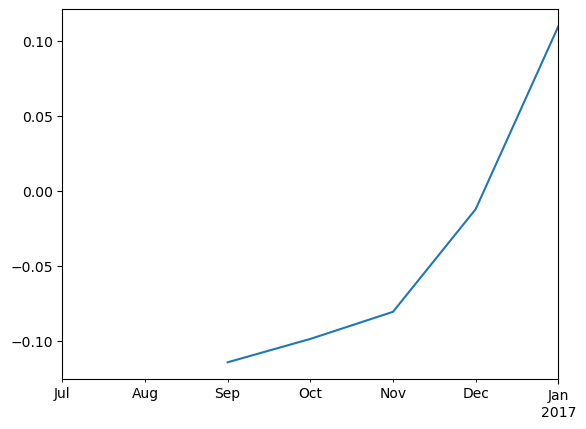

In [155]:
ts_long = pd.Series(np.random.randn(200),pd.date_range('7/1/16',freq = 'D',periods =200))
ts_long.resample('M').mean().rolling(window=3).mean().plot()

how about exponentially weighted moving average? `.ewm()` method!

* older values are given less weight, recent values are given higher weight

pandas calculates EWM with the given formula: $$\text{EWMA}_t = \alpha*X_t + (1-\alpha)*\text{EWMA}_{t-1}$$ 

where $\alpha$ is the smoothing factor.

ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html

<Axes: >

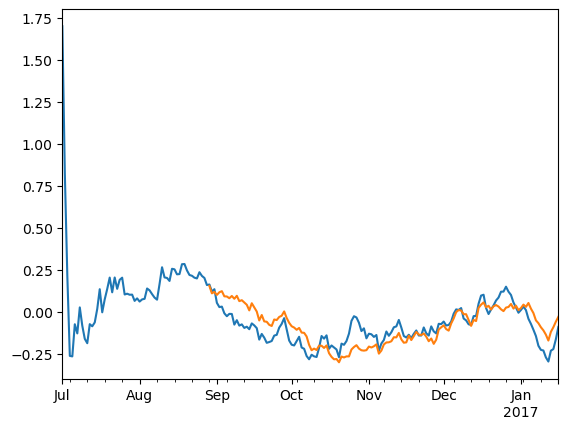

In [159]:
ts = pd.Series(np.random.randn(200),pd.date_range('7/1/16',freq = 'D',periods =200))
ts.ewm(span=60,min_periods=0,adjust=True).mean().plot()
ts.rolling(window=60).mean().plot()